In [1]:
from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import warnings

## Convenience functions

In [2]:
def calculate_boltzmann(N=10000, T=1000, method="classic"):
    # Print to screen
    print(f"Number of energy levels: {N}")
    print(f"Temperature: {T}")
    if (N < 2) | (N > 10000) | (T < 1e-7) | (T > 1e7):
        print("Error in input parameters.")
        return -1

    # Define beta factor
    beta = 1.0 / T

    # Calculate energy level occupancy
    level_occupancy = np.fromfunction(
        lambda n: boltzmann_factor(n, beta=beta, method=method), (N,), dtype=int
    )

    # Normalize
    norm_factor = level_occupancy.sum()
    if norm_factor == 0:
        warnings.warn(
            "Warning: bad luck... you didn't complete the exercise, and now you are trying to divide by 0..."
        )

    level_occupancy = np.true_divide(
        level_occupancy,
        norm_factor,
        out=np.zeros_like(level_occupancy),
        where=norm_factor != 0,
    )

    return level_occupancy

In [3]:
def main(N=10000, T_array=[1, 10, 100, 1000], method="nondegenerate", format_fig="pdf"):
    """N : number of particles
       T_array: array of temperatures
       method: method to specify degeneracy and energy of a single level
    """
    if not isinstance(T_array, list):
        T_array = [T_array]

    for T in T_array:
        distribution = calculate_boltzmann(N=10000, T=T, method=method)

        #  Clip distribution on the lower end
        threshold = np.argwhere(distribution > 1e-6)

        ax = plt.plot(threshold, distribution[threshold], "--o", ms=4, label=f"T={T}")

    plt.xscale("log")
    plt.yscale("log")
    plt.legend(loc="best")
    plt.xlabel("Energy Level E")
    plt.ylabel("P(E)")
    plt.title(
        f"Energy level occupancy according to a Boltzmann distribution ({method})",
        fontsize=10,
    )
    plt.savefig(f"energy_occupancy_{method}.{format_fig}")

# EXERCISE: complete the function below, needed for the function `calculate_boltzmann`

In [4]:
def boltzmann_factor(n, beta, method):
    """ n: energy level (in integer units) 
        beta: temperature factor
        method: method to specify degeneracy and energy of a single level
    """
    if isinstance(n, np.ndarray):
        factor = np.zeros(shape=n.shape)
    else:
        factor = 0

    if method == "nondegenerate":
        factor = np.exp(-beta * n)
    elif method == "degenerate":
        # your code here...
        pass
    elif method == "rotor":
        # your code here...
        pass
    else:
        print("Invalid method.")
        return -1

    return factor

# SOLUTION (execute this cell if you wish to see the solution)

In [4]:
# %load solutions/boltzmann.py
def boltzmann_factor(n, beta, method):
    """ n: energy level (in integer units) 
        beta: temperature factor
        method: method to specify degeneracy and energy of a single level
    """
    if isinstance(n, np.ndarray):
        factor = np.zeros(shape=n.shape)
    else:
        factor = 0
        
    if method == "nondegenerate":
        factor = np.exp(-beta * n)
    elif method == "degenerate":
        factor = (n + 1) * np.exp(-beta * n)
    elif method == "rotor":
        factor = (2 * n + 1) * np.exp(-0.5 * beta * n * (n + 1))
    else:
        print("Invalid method.")
        return -1
    
    return factor

# Run the program

Number of energy levels: 10000
Temperature: 20
Number of energy levels: 10000
Temperature: 50
Number of energy levels: 10000
Temperature: 200
Number of energy levels: 10000
Temperature: 1000


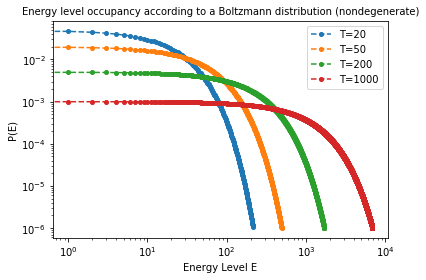

In [6]:
main(N=10000, T_array=[20, 50, 200, 1000], method="nondegenerate")

Number of energy levels: 10000
Temperature: 1
Number of energy levels: 10000
Temperature: 10
Number of energy levels: 10000
Temperature: 100
Number of energy levels: 10000
Temperature: 1000


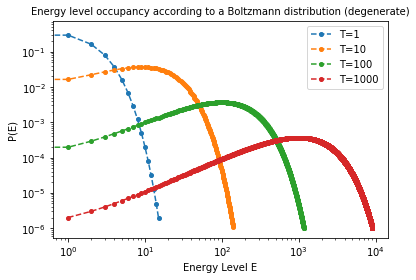

In [20]:
main(N=10000, T_array=[1, 10, 100, 1000], method="degenerate")

Number of energy levels: 10000
Temperature: 1
Number of energy levels: 10000
Temperature: 10
Number of energy levels: 10000
Temperature: 100
Number of energy levels: 10000
Temperature: 1000


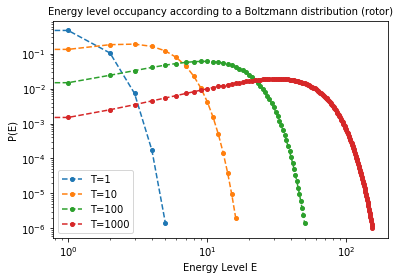

In [21]:
main(N=10000, T_array=[1, 10, 100, 1000], method="rotor")